In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x = []

count=10

infile = r"/home/aryna/Documents/Sem_5/CV/AerialPoseEstimator/Logs/varying_gamma_logs.txt"

columns = ["Coordinate regression error",
    "30m10deg",
    "20m10deg",
    "10m7deg",
    "10m10deg",
    "5m5deg",
    "3m3deg"]
acc1 = []
acc2 = []
acc3 = []
acc4 = []
acc5 = []
acc6 = []
cr_mean = []
cr_median = []
cr_std = []

In [5]:
with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in columns:
        if phrase in line:
            
            line1 = str(line)
            line1.split(':')
            index = columns.index(line1.split(':')[0])

            if(index==0):
                x.append(count/10)
                count += 1
                line1=line1.split('\n')[0]
                cr_median.append(float(line1.split(', median ')[1]))
                line1=line1.split(', median ')[0]
                cr_std.append(float(line1.split(', std ')[1]))
                line1=line1.split(', std ')[0]
                cr_mean.append(float(line1.split('mean ')[1]))
            else:
                value = float(line1.split(': ')[1].split('%')[0])            
                arr = "acc"+str(index)
                eval(arr).append(value)
            break

In [8]:
accuracy_map = {
    'gamma':x,
    "30m10deg":acc1,
    "20m10deg":acc2,
    "10m7deg":acc3,
    "10m10deg":acc4,
    "5m5deg":acc5,
    "3m3deg":acc6
}
accuracy_df = pd.DataFrame(accuracy_map)

cr_error_map = {
    'gamma':x,
    'mean':cr_mean,
    'median':cr_median,
    'std':cr_std
}
cr_error_df = pd.DataFrame(cr_error_map)

In [9]:
sns.set(style='darkgrid')

Text(0.5, 1.0, 'Accuracy chart')

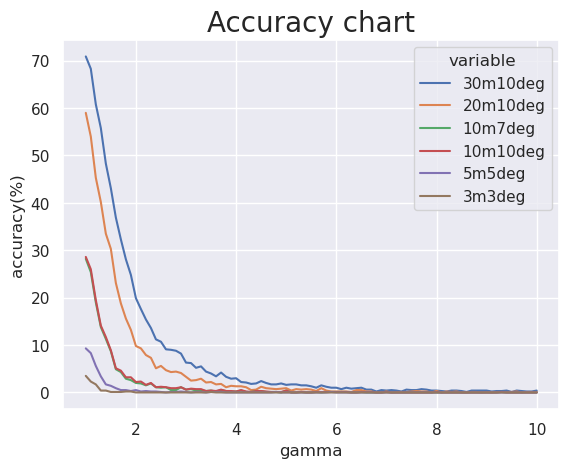

In [10]:
sns.lineplot(x='gamma',
             y='accuracy(%)',
             hue='variable',
             data=pd.melt(accuracy_df, ['gamma'], value_name='accuracy(%)')).set_title('Accuracy chart', fontdict = {'fontsize': 20, 'horizontalalignment':'center',})

Text(0.5, 1.0, 'Coordinate regression error chart')

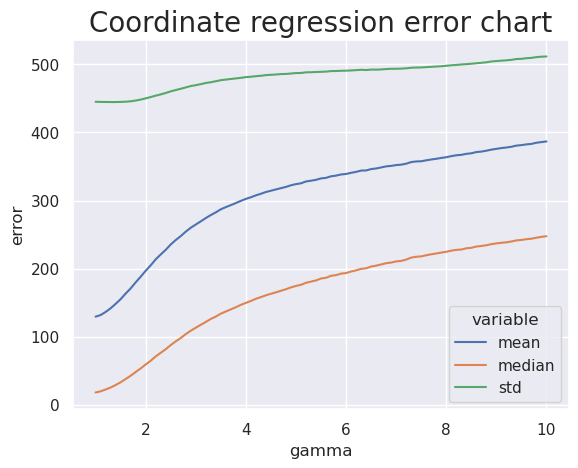

In [11]:
sns.lineplot(x='gamma',
             y='error',
             hue='variable', 
             data=pd.melt(cr_error_df, ['gamma'], value_name='error')).set_title('Coordinate regression error chart', fontdict = {'fontsize': 20, 'horizontalalignment':'center',})

In [ ]:
# plt.plot(x,acc1, label="30m10deg")
# plt.plot(x,acc2, label="20m10deg")
# plt.plot(x,acc3, label="10m7deg")
# plt.plot(x,acc4, label="10m10deg")
# plt.plot(x,acc5, label="5m5deg")
# plt.plot(x,acc6, label="3m3deg")
# plt.legend()
# plt.show()